# Tarea 1

## Posibles mejoras

* Modelo de precios dinámico en función de la oferta y la demanda.
* Sistema de recomendación en base al historial de búsqueda y/o reservas anteriores
* Detección de opiniones falsas hechas por los anfitriones

In [1]:
%pip install pandas matplotlib seaborn openpyxl

Note: you may need to restart the kernel to use updated packages.


## Lectura de datos

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

#file_path = '/Users/luisi/Documents/Master-Big-Data/Aplicaciones y casos de uso empresarial/Practica/Datos/MO_dataset_airbnb_nyc.xlsx'
file_path = '/home/uisito/Documentos/Master-Big-Data/Aplicaciones y casos de uso empresarial/Practica/Datos/MO_dataset_airbnb_nyc.xlsx'
data = pd.read_excel(file_path, header=0)
data.head()

,id,name,host_id,host_name,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,2539,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Private room,149.0,1.0,9.0,0.21,365.0
1,2595,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Entire home/apt,225.0,1.0,45.0,0.38,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632.0,Elisabeth,Manhattan,Private room,150.0,3.0,0.0,NaN,365.0
3,3831,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Entire home/apt,89.0,1.0,270.0,4.64,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,Entire home/apt,80.0,10.0,9.0,0.10,0.0


## Limpieza y preprocesamiento de datos

In [4]:
# verificamos si hay valores faltantes
data.isnull().sum()

id                       0
name                     4
host_id                  7
host_name               11
neighbourhood_group      7
room_type                7
price                    9
minimum_nights           7
number_of_reviews        9
reviews_per_month      572
availability_365         7
dtype: int64

In [5]:
data = data.dropna(subset=['host_id', 'neighbourhood_group', 'room_type'])

cols_median = ['price', 'minimum_nights', 'availability_365']
data[cols_median] = data[cols_median].apply(lambda x: x.fillna(x.median()))

cols_0 = ['number_of_reviews', 'reviews_per_month']
data[cols_0] = data[cols_0].apply(lambda x: x.fillna(0))

cols_desconocidas = ['name', 'host_name']
data[cols_desconocidas] = data[cols_desconocidas].fillna("Desconocido")

cols_int = ['host_id', 'minimum_nights', 'number_of_reviews', 'availability_365']
data[cols_int] = data[cols_int].apply(lambda x: x.astype(int))

print(f'Nulos: {data.isnull().sum().sum()}')
data.info()

# Mostrar las primeras filas del DataFrame después de la limpieza
data.head()

Nulos: 0
<class 'pandas.core.frame.DataFrame'>
Index: 6117 entries, 0 to 6123
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   6117 non-null   int64  
 1   name                 6117 non-null   object 
 2   host_id              6117 non-null   int64  
 3   host_name            6117 non-null   object 
 4   neighbourhood_group  6117 non-null   object 
 5   room_type            6117 non-null   object 
 6   price                6117 non-null   float64
 7   minimum_nights       6117 non-null   int64  
 8   number_of_reviews    6117 non-null   int64  
 9   reviews_per_month    6117 non-null   float64
 10  availability_365     6117 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 573.5+ KB


,id,name,host_id,host_name,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Private room,149.0,1,9,0.21,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Entire home/apt,225.0,1,45,0.38,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Private room,150.0,3,0,0.00,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Entire home/apt,89.0,1,270,4.64,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,Entire home/apt,80.0,10,9,0.10,0


## Tareas de análisis
### ¿Qué zonas de Nueva York son las que ofrecen una mayor oferta de alojamiento?

  neighbourhood_group  count
3           Manhattan   2824
2            Brooklyn   2733
4              Queens    432
1               Bronx     85
5       Staten Island     35
0              Bookyn      8


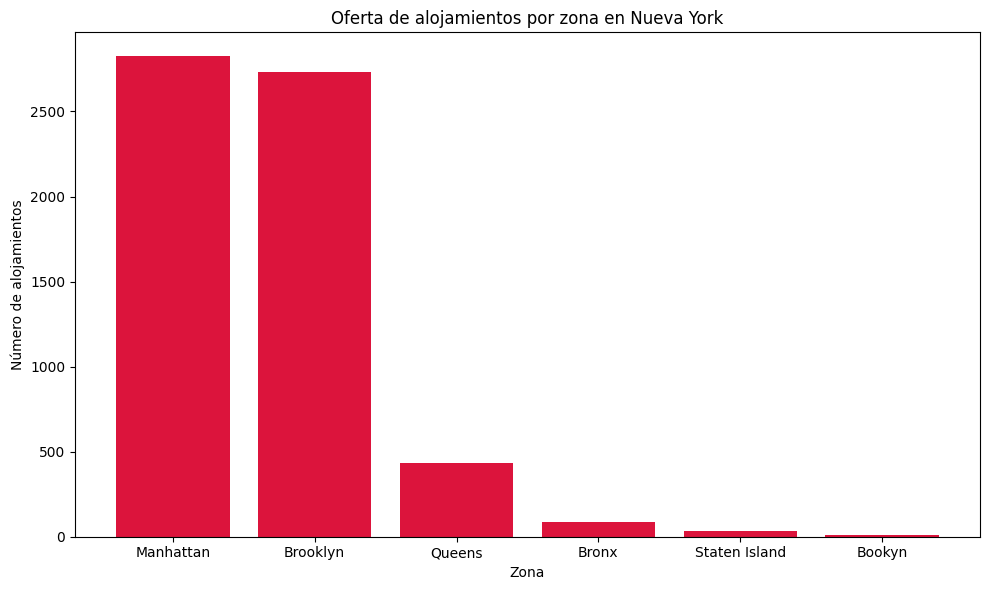

In [6]:
agrupamiento_zonas = (data.groupby(['neighbourhood_group'])
                      .size()
                      .reset_index(name='count')
                      .sort_values(by='count', ascending=False))

print(agrupamiento_zonas)

plt.figure(figsize=(10, 6))
plt.bar(agrupamiento_zonas['neighbourhood_group'], agrupamiento_zonas['count'], color='crimson')
plt.title('Oferta de alojamientos por zona en Nueva York')
plt.xlabel('Zona')
plt.ylabel('Número de alojamientos')
plt.tight_layout()
plt.show()

### Para cada zona, ¿qué tipo de alojamiento es el más ofertado?

   neighbourhood_group        room_type  count
8            Manhattan  Entire home/apt   1852
5             Brooklyn  Entire home/apt   1636
12              Queens     Private room    236
3                Bronx     Private room     58
15       Staten Island     Private room     19
0               Bookyn  Entire home/apt      5


/tmp/ipykernel_8242/3399444178.py:15: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.barplot(x='neighbourhood_group', y='count', hue='room_type', data=tipo_alojamiento, palette=list(colores.values()))


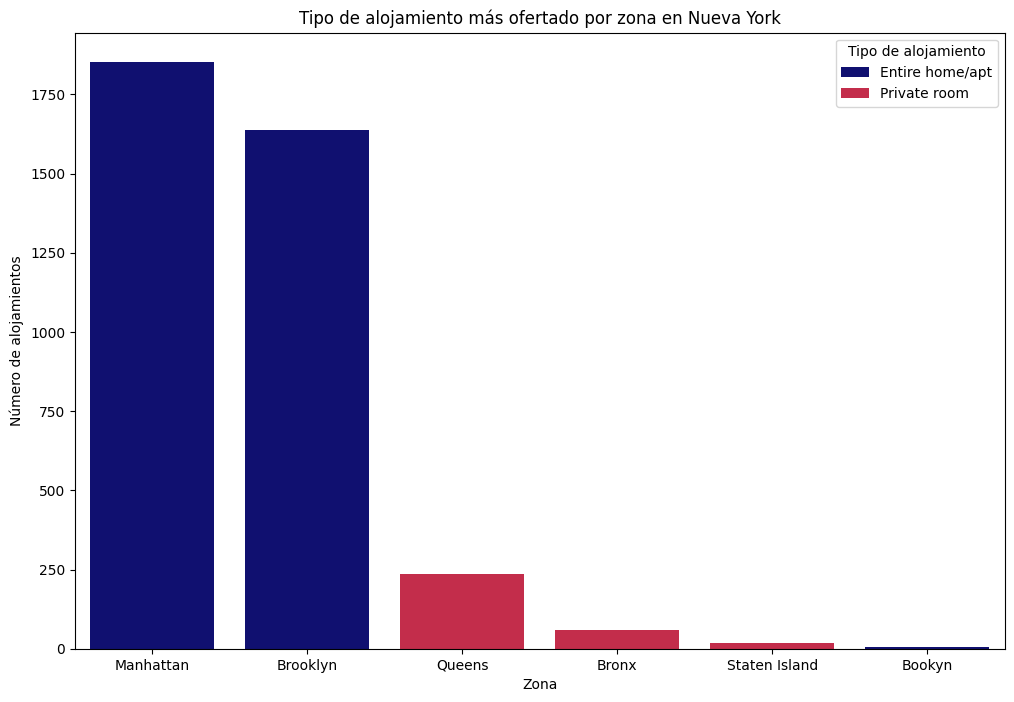

In [7]:
tipo_alojamiento = (data.groupby(['neighbourhood_group', 'room_type'])
                    .size()
                    .reset_index(name='count')
                    .loc[lambda x: x.groupby('neighbourhood_group')['count'].idxmax()]
                    .sort_values(by='count', ascending=False))

print(tipo_alojamiento)


import seaborn as sns

colores = {'Entire home/apt': 'navy', 'Private room': 'crimson', 'Shared room': 'springgreen'}

plt.figure(figsize=(12, 8))
sns.barplot(x='neighbourhood_group', y='count', hue='room_type', data=tipo_alojamiento, palette=list(colores.values()))
plt.title('Tipo de alojamiento más ofertado por zona en Nueva York')
plt.xlabel('Zona')
plt.ylabel('Número de alojamientos')
plt.legend(title='Tipo de alojamiento')
plt.show()

### ¿Cuáles son las zonas más caras?¿Y las más populares?¿Coinciden unas con otras?

  neighbourhood_group       price  number_of_reviews
0              Bookyn  106.750000         120.875000
1               Bronx   72.411765          72.094118
2            Brooklyn  149.331870          55.528723
3           Manhattan  204.288598          52.439093
4              Queens  100.699074          59.381944
5       Staten Island  137.742857          71.314286

Zona más cara: Manhattan, con un precio medio de $204.29
Zona más popular: Bookyn, con una media de 120.88 reviews


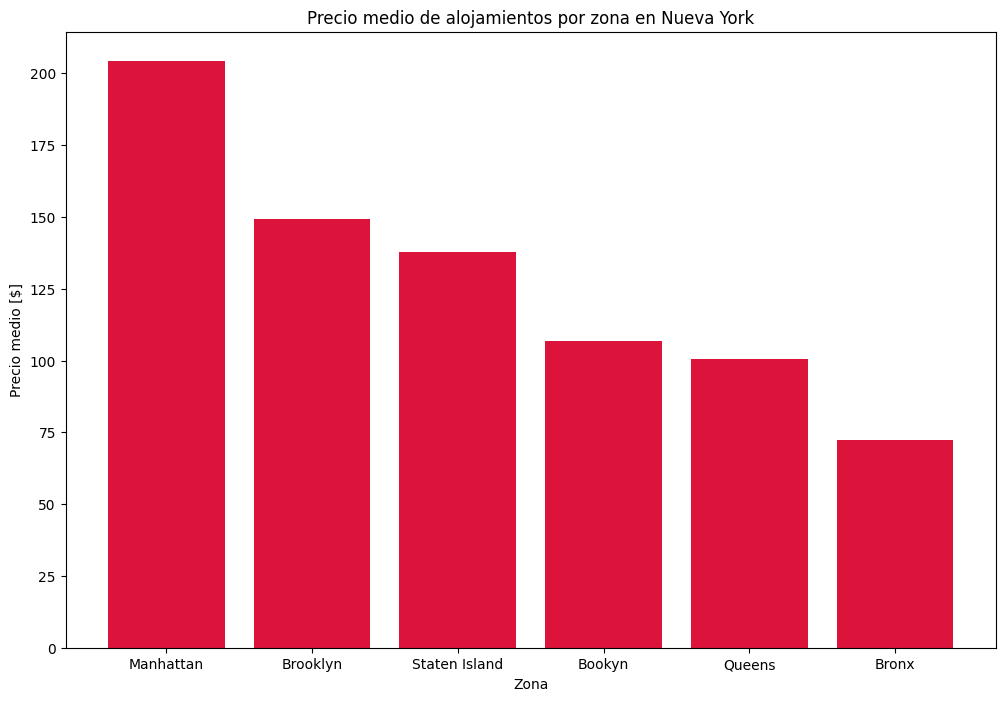

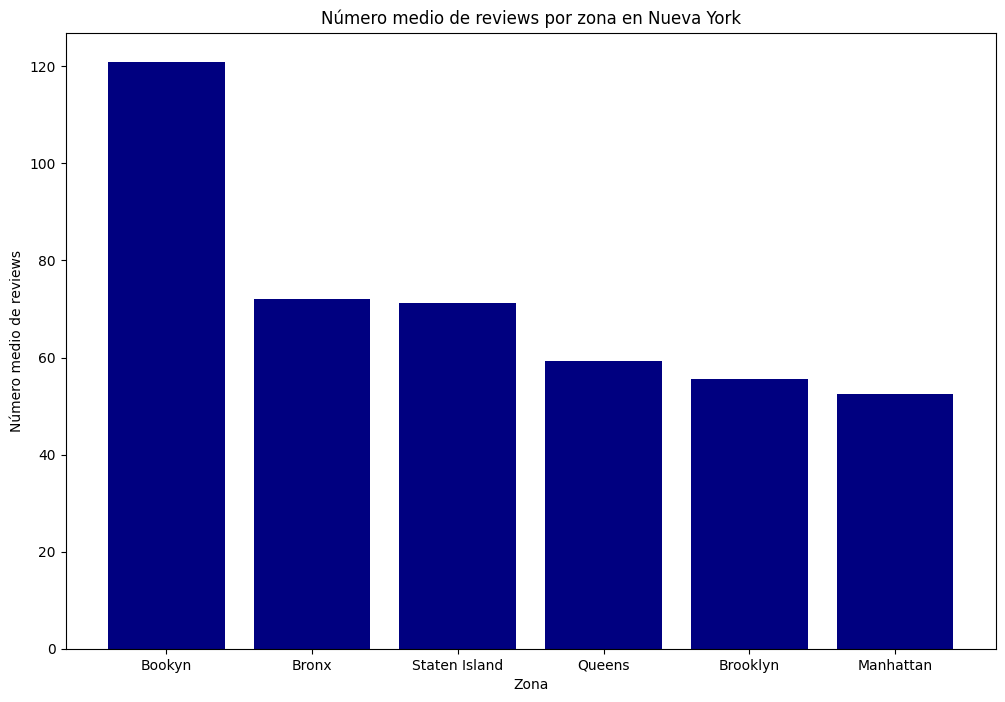

In [10]:
precio_review_stats = (data.groupby('neighbourhood_group')
                       .agg({'price': 'mean', 'number_of_reviews': 'mean'})
                       .reset_index())

print(precio_review_stats)

most_expensive = precio_review_stats.loc[precio_review_stats['price'].idxmax()]
print(f"\nZona más cara: {most_expensive['neighbourhood_group']}, con un precio medio de ${most_expensive['price']:.2f}")

most_popular = precio_review_stats.loc[precio_review_stats['number_of_reviews'].idxmax()]
print(f"Zona más popular: {most_popular['neighbourhood_group']}, con una media de {most_popular['number_of_reviews']:.2f} reviews")


# precios medios por zona
precio_review_stats = precio_review_stats.sort_values(by='price', ascending=False)
  
plt.figure(figsize=(12, 8))
plt.bar(precio_review_stats['neighbourhood_group'], precio_review_stats['price'], color='crimson')
plt.title('Precio medio de alojamientos por zona en Nueva York')
plt.xlabel('Zona')
plt.ylabel('Precio medio [$]')
plt.show()


# reviews medias por zona
precio_review_stats = precio_review_stats.sort_values(by='number_of_reviews', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(precio_review_stats['neighbourhood_group'], precio_review_stats['number_of_reviews'], color='navy')
plt.title('Número medio de reviews por zona en Nueva York')
plt.xlabel('Zona')
plt.ylabel('Número medio de reviews')
plt.show()

### ¿Los dueños de más de un alojamiento tienen sus ofertas en el mismo sitio o en sitios diferentes?

Identificar a los dueños que poseen más de un alojamiento y analizar si estos alojamientos se concentran en una misma zona o se distribuyen en diferentes zonas.

   neighbourhood_group  count
0                    1    487
1                    2     10


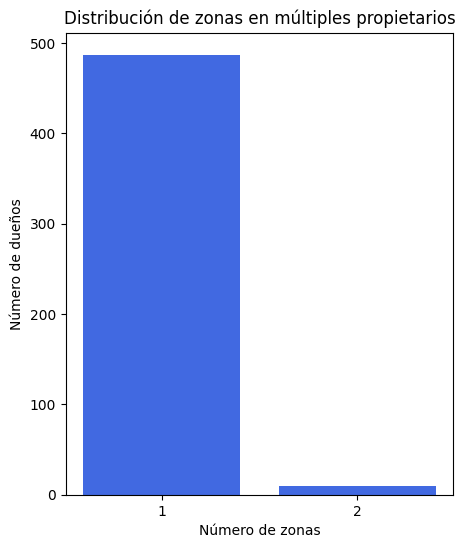

In [11]:
especuladores = (data.groupby('host_id') # agrupamos por propietario
                 .filter(lambda x: len(x) > 1) # filtramos multiples propietarios
                 .groupby('host_id')['neighbourhood_group'] # agrupamos por propietario y cogemos la zona
                 .nunique()
                 .value_counts()
                 .reset_index())

print(especuladores)

plt.figure(figsize=(5, 6))
plt.bar(especuladores['neighbourhood_group'], especuladores['count'], color='royalblue')
plt.title('Distribución de zonas en múltiples propietarios')
plt.xlabel('Número de zonas')
plt.ylabel('Número de dueños')
plt.xticks([1, 2])
plt.show()

### ¿Cuál es el alojamiento más caro teniendo en cuenta el número mínimo de noches por reserva?¿Y el más barato?

In [12]:
data['total_minimum_cost'] = data['price'] * data['minimum_nights']

# mas caro
most_expensive_listing = data.loc[data['total_minimum_cost'].idxmax()]
print(f"Alojamiento más caro: {most_expensive_listing['name']} en {most_expensive_listing['neighbourhood_group']} por ${most_expensive_listing['total_minimum_cost']:.2f} para la estancia mínima de {most_expensive_listing['minimum_nights']} noche/s")


# mas barato
cheapest_listing = data.loc[data['total_minimum_cost'].idxmin()]
print(f"Alojamiento más barato: {cheapest_listing['name']} en {cheapest_listing['neighbourhood_group']} por ${cheapest_listing['total_minimum_cost']:.2f} para la estancia mínima de {cheapest_listing['minimum_nights']} noche/s")

Alojamiento más caro: Desconocido en Manhattan por $400000.00 para la estancia mínima de 1000 noche/s
Alojamiento más barato: $455 Cozy 1bd, BKLYN Sublet March en Brooklyn por $18.00 para la estancia mínima de 1 noche/s


# Tarea 2

## Posibles mejoras

* Ofertas en productos complementarios a productos muy consumidos 
* Predecir las tendencias de consumo para mejorar la gestión de inventario.

## Lectura de datos

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

#compras_path = '/Users/luisi/Documents/Master-Big-Data/Aplicaciones y casos de uso empresarial/Practica/Datos/MO_dataset_compras.xlsx'
compras_path = '/home/uisito/Documentos/Master-Big-Data/Aplicaciones y casos de uso empresarial/Practica/Datos/MO_dataset_compras.xlsx'
df_compras = pd.read_excel(compras_path, header=2)
df_compras.head()

,ID CLIENTE,ID COMPRA,Leche Pascual,Precio Leche Pascual (unidad),Leche FROIZ,Precio Leche Froiz (unidad),Pan,Precio Pan,Mantequilla,Precio Mantequilla,...,Precio Lechuga,Filetes Ternera (pack 1 kg),Precio Filetes Ternera,Filetes Cerdo (pack 1 kg),Precio Filetes Cerdo,Pizza Tarradellas,Precio Pizza Tarradellas,Pizza FROIZ,Precio Pizza FROIZ,TIPO COMPRA
0,100,1,6,0.9,0,0.0,2,0.6,0,0,...,0.7,1,28,0,0,0,0.0,0,0.0,Familiar
1,110,2,6,0.9,0,0.0,1,0.6,1,1,...,0.7,0,0,0,0,0,0.0,0,0.0,Familiar
2,120,3,6,0.9,0,0.0,0,0.0,0,0,...,0.7,1,28,0,0,0,0.0,0,0.0,Individual
3,130,4,0,0.0,6,0.6,1,0.6,1,1,...,0.0,0,0,0,0,1,2.7,0,0.0,Individual
4,140,5,0,0.0,6,0.6,1,0.6,0,0,...,0.0,0,0,1,11,0,0.0,1,1.7,Individual


In [14]:
#clientes_path = '/Users/luisi/Documents/Master-Big-Data/Aplicaciones y casos de uso empresarial/Practica/Datos/MO_dataset_clientes.xlsx'
clientes_path = '/home/uisito/Documentos/Master-Big-Data/Aplicaciones y casos de uso empresarial/Practica/Datos/MO_dataset_clientes.xlsx'
df_clientes = pd.read_excel(clientes_path, header=2)
df_clientes.head()

,ID CLIENTE,Edad,Profesion
0,100,50,Liberal
1,110,60,Funcionario
2,120,40,Liberal
3,130,20,Estudiante
4,140,25,Estudiante


## Limpieza y preprocesamiento de datos

In [15]:
# verificamos si hay valores faltantes
print(f'{df_compras.isnull().sum()}\n')
print(df_clientes.isnull().sum())

ID CLIENTE                       0
ID COMPRA                        0
Leche Pascual                    0
Precio Leche Pascual (unidad)    0
Leche FROIZ                      0
Precio Leche Froiz (unidad)      0
Pan                              0
Precio Pan                       0
Mantequilla                      0
Precio Mantequilla               0
Cerveza                          0
Precio Cerveza (lata unidad)     0
Lechuga                          0
Precio Lechuga                   0
Filetes Ternera (pack  1 kg)     0
Precio Filetes Ternera           0
Filetes Cerdo (pack 1 kg)        0
Precio Filetes Cerdo             0
Pizza Tarradellas                0
Precio Pizza Tarradellas         0
Pizza FROIZ                      0
Precio Pizza FROIZ               0
TIPO COMPRA                      0
dtype: int64

ID CLIENTE    0
Edad          0
Profesion     0
dtype: int64


## Tareas de análisis
### ¿Cuáles son los productos más vendidos?¿Y los que facturan más teniendo en cuenta el coste del producto?

                          index  num_ventas  facturacion
0                 Leche Pascual          54         48.6
1                   Leche FROIZ          66         39.6
2                           Pan          21         12.6
3                   Mantequilla           7          7.0
4                       Cerveza          54         35.1
5                       Lechuga          11          7.7
6  Filetes Ternera (pack  1 kg)           9        252.0
7     Filetes Cerdo (pack 1 kg)          10        110.0
8             Pizza Tarradellas          12         32.4
9                   Pizza FROIZ           9         15.3


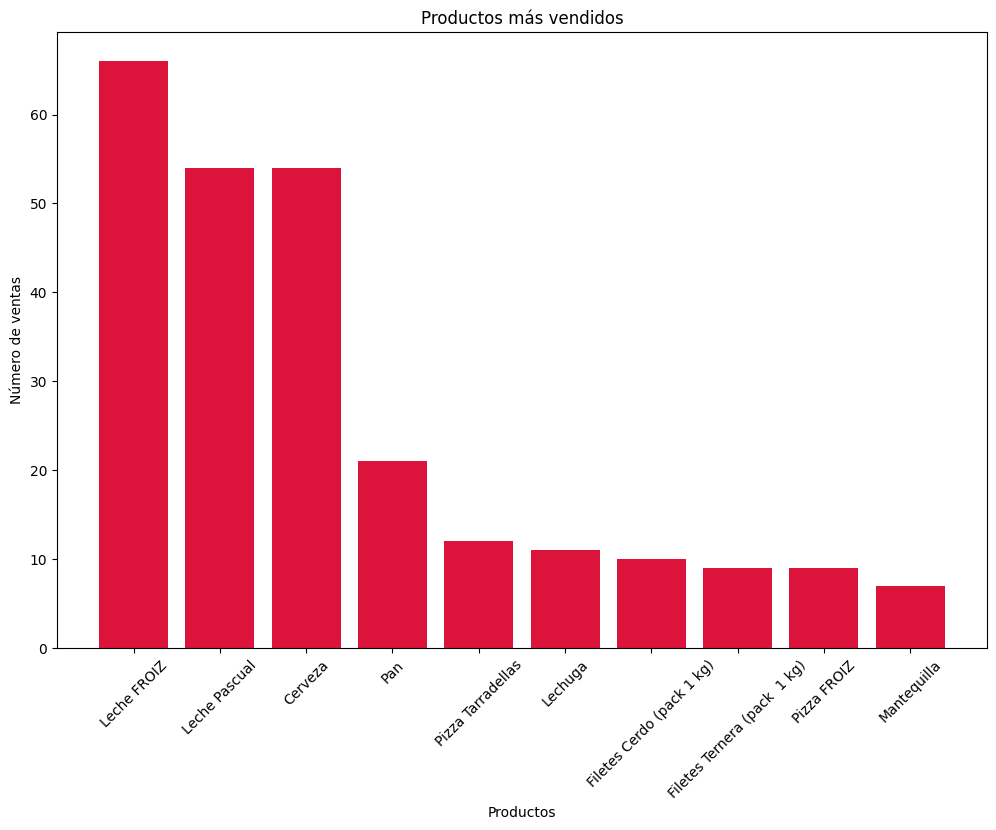

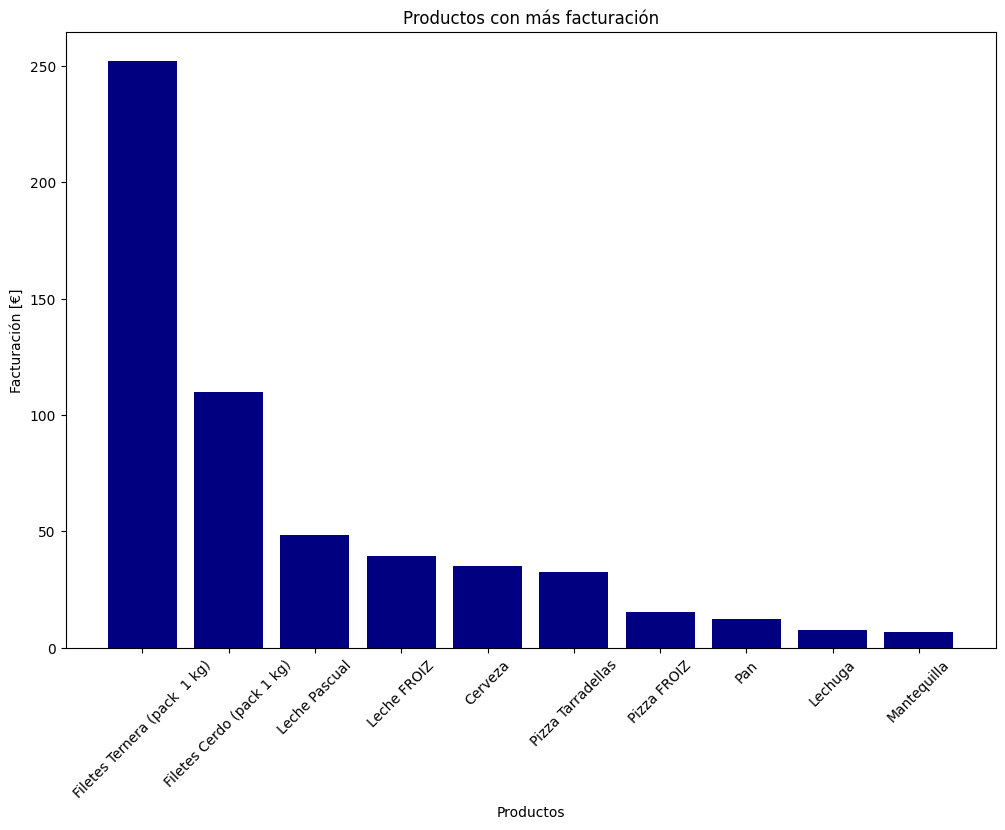

In [16]:
columnas = pd.Series(df_compras.columns)
productos = columnas[~columnas.str.contains('Precio|ID|TIPO')]
precios = columnas[columnas.str.contains('Precio')]

cuentas = pd.DataFrame({'num_ventas': df_compras[productos].sum(),
                        'facturacion': (df_compras[productos].mul(df_compras[precios].values)).sum()}).reset_index()

print(cuentas)
# productos
cuentas = cuentas.sort_values(by = 'num_ventas', ascending = False)

plt.figure(figsize=(12, 8))
plt.bar(cuentas['index'], cuentas['num_ventas'], color='crimson')
plt.title('Productos más vendidos')
plt.xlabel('Productos')
plt.ylabel('Número de ventas')
plt.xticks(rotation=45)
plt.show()


# facturacion
cuentas = cuentas.sort_values(by='facturacion', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(cuentas['index'], cuentas['facturacion'], color='navy')
plt.title('Productos con más facturación')
plt.xlabel('Productos')
plt.ylabel('Facturación [€]')
plt.xticks(rotation=45)
plt.show()

### ¿Qué tipo de productos se compran en conjunto?¿Identificas alguna relación entre ellos?

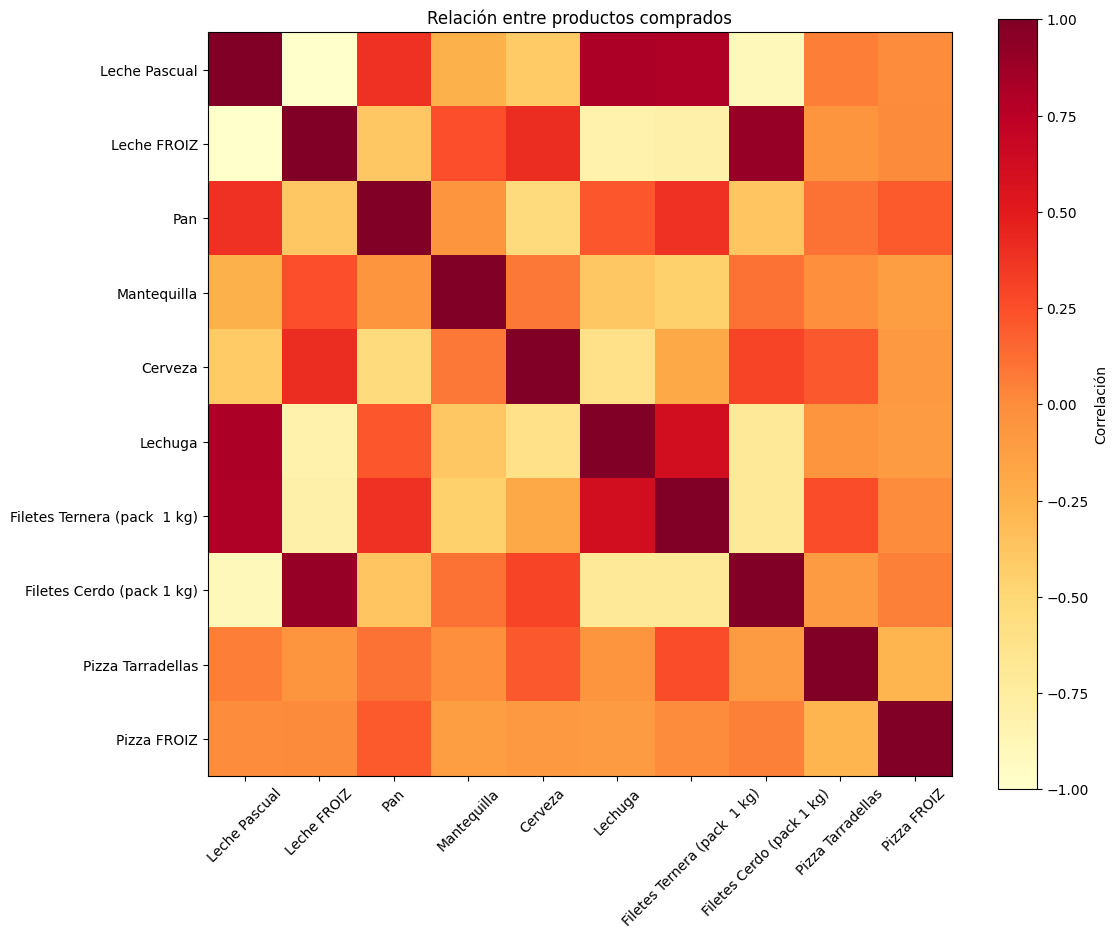

In [17]:
correlacion = df_compras[productos].corr()

plt.figure(figsize=(12, 10))
plt.imshow(correlacion, cmap='YlOrRd')
plt.colorbar(label='Correlación')

plt.xticks(range(len(productos)), productos, rotation=45)
plt.yticks(range(len(productos)), productos)
plt.title('Relación entre productos comprados')
plt.show()

### ¿Cuál es el gasto medio por compra?

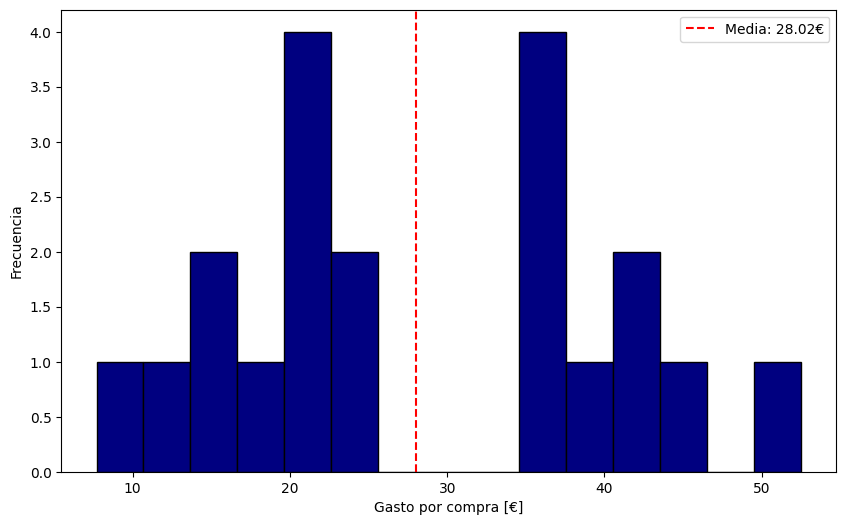

In [19]:
gasto = (df_compras[productos].mul(df_compras[precios].values)).sum(axis=1)

plt.figure(figsize=(10, 6))
plt.hist(gasto, bins=15, color='navy', edgecolor='black')
plt.axvline(gasto.mean(), color='red', linestyle='dashed', label=f'Media: {gasto.mean():.2f}€')
plt.xlabel('Gasto por compra [€]')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

### ¿Qué perfiles tienen los clientes? ¿Qué segmentación harías en base a los datos disponibles de los clientes?

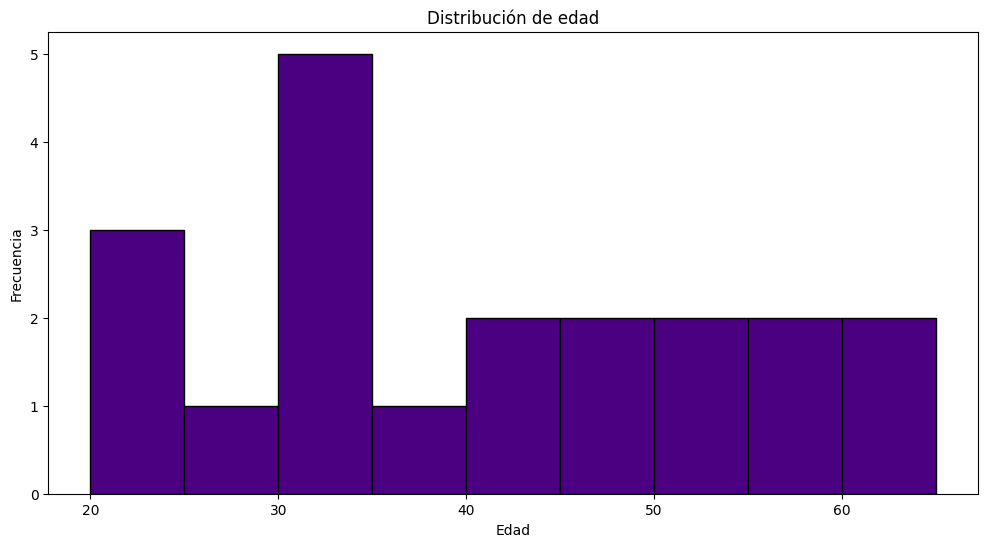

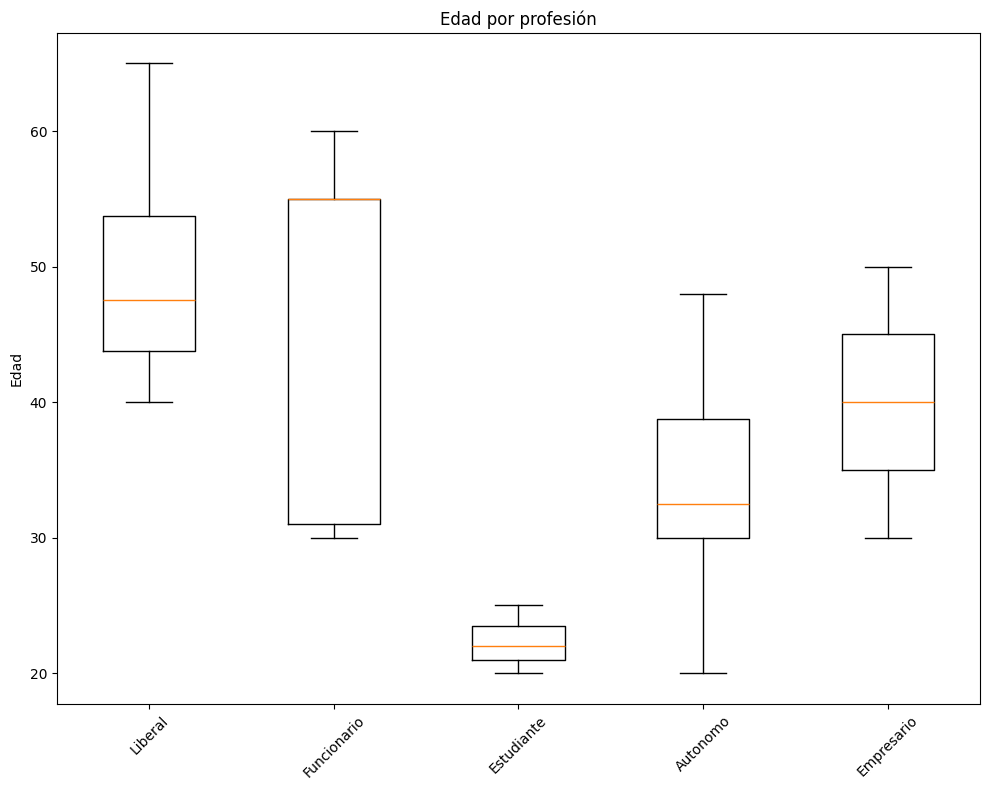

In [20]:
# distribucion de edad
plt.figure(figsize=(12, 6))
plt.hist(df_clientes['Edad'], bins=9, color='indigo', edgecolor='black')
plt.title('Distribución de edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')


# edad por profesion
plt.figure(figsize=(10, 8))
boxplot = plt.boxplot([df_clientes[df_clientes['Profesion'] == prof]['Edad'] 
                       for prof in df_clientes['Profesion'].unique()], 
                       tick_labels=df_clientes['Profesion'].unique())

plt.title('Edad por profesión')
plt.xticks(rotation=45)
plt.ylabel('Edad')

plt.tight_layout()
plt.show()

### ¿Detectas diferencias en las compras para cada perfil de cliente?

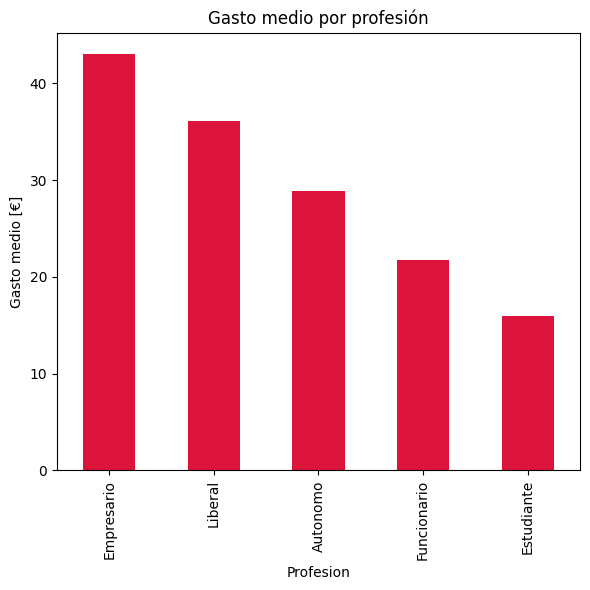

<Figure size 2000x600 with 0 Axes>

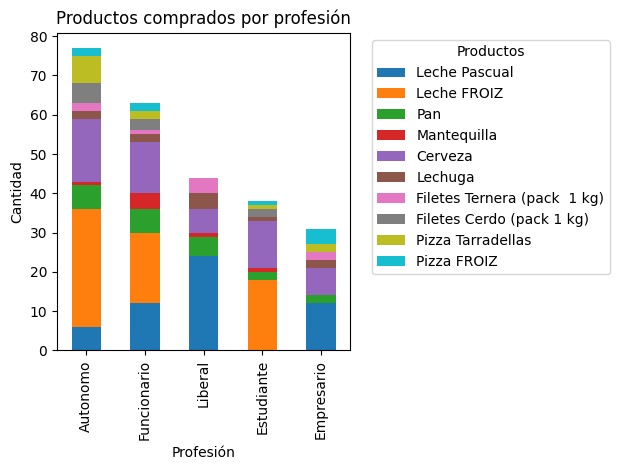

In [22]:
df_completo = pd.merge(df_compras, df_clientes, on='ID CLIENTE')

# gasto por compra
df_completo['gasto_total'] = (df_completo[productos].mul(df_completo[precios].values)).sum(axis=1)

df_completo_gasto = (df_completo.groupby('Profesion')['gasto_total']
                     .agg(['mean', 'count'])
                     .round(2)
                     .sort_values(by='mean', ascending=False))

# gasto medio por profesión
plt.figure(figsize=(6, 6))
df_completo_gasto['mean'].plot(kind='bar', color='crimson')
plt.title('Gasto medio por profesión')
plt.ylabel('Gasto medio [€]')
plt.tight_layout()
plt.show()


# productos mas comprados por profesion
productos_por_profesion = (df_completo.groupby('Profesion')[productos]
                          .sum()
                          .assign(total = lambda x: x.sum(axis=1))
                          .sort_values(by='total', ascending=False)
                          .drop('total', axis=1))

plt.figure(figsize=(20, 6))
productos_por_profesion.plot(kind='bar', stacked=True)
plt.title('Productos comprados por profesión')
plt.xlabel('Profesión')
plt.ylabel('Cantidad')
plt.legend(title='Productos', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()
